In [48]:
import numpy as np
import pylab as pl
from scipy import interpolate,optimize
%pylab inline

import json
s = json.load( open("GigEtests/fbb_matplotlibrc.json") )
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# set up

In [54]:
fitfunc = lambda p, t: p[0]*cos(2*np.pi*p[1]*t+p[2]) # Target function
errfunc = lambda p, y: fitfunc(p, y[0]) - y[1] # Distance to the target function
wave = lambda t: np.sin(2.*freq*np.pi*t+phi)
waveglitch = lambda t,t0: np.sin(2.*freq*np.pi*t+phi)*(t<t0)+np.sin(2.*freq*np.pi*t+phi+1)*(t>=t0)
waveinteg = lambda  t,dt: -1.0/(2.*freq*np.pi)*(cos(2.*freq*np.pi*(t+dt*0.5)+phi)-cos(2.*freq*np.pi*(t-dt*0.5)+phi))


freq=120. #Hz
tottime=400. #sec
cycles=120*tottime
npoints=1000*cycles
phi=np.pi*0.5

# the original 120Hz wave function

(0, 0.008333333333333333)

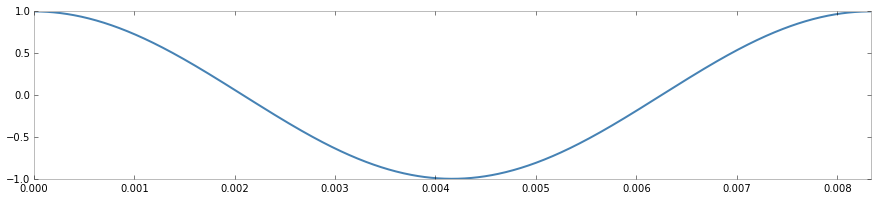

In [55]:
t=np.linspace(0,tottime,npoints)
pl.figure(figsize=(15,3))
pl.plot(t,wave(t),color='SteelBlue')
pl.xlim(0,1.0/120)

# sampling at 119.8Hz

(0, 5.0)

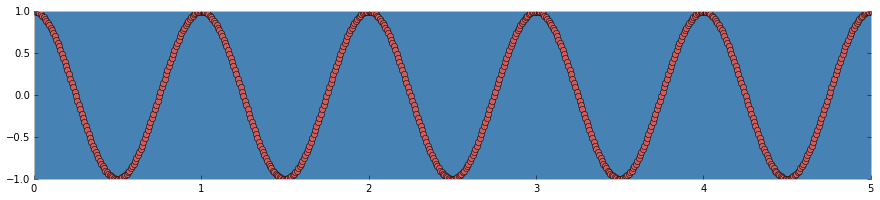

In [56]:
shutterfreq=119
#Hz
#tsample=(freq/shutterfreq)*1e3
tselect=np.arange(0,tottime,1.0/shutterfreq)
#t[::int(tsample+0.5)]
pl.figure(figsize=(15,3))
phi=np.pi/2
pl.plot(t,wave(t),color='SteelBlue')
pl.plot(tselect,wave(tselect),'o', color='IndianRed')

pl.xlim(0,5.0)

# now integrate the 119Hz signal for 1/8 of a second at 1 second cadence, and add a glitch

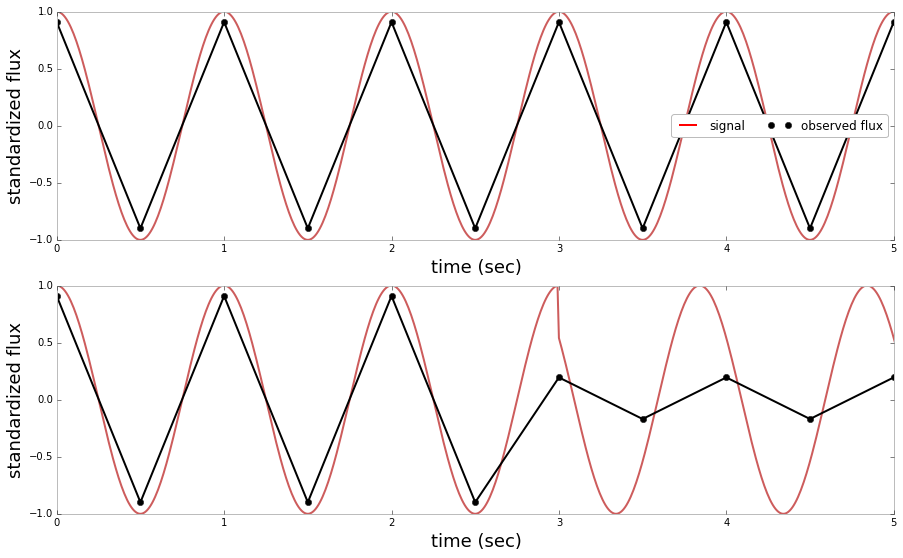

In [57]:
#print [i for i in range(0,len(tselect),41) if len(tselect[i:i+41])>1]
totflux=np.array([[i,(wave(tselect[(tselect>=i)*(tselect<(i+0.125))])).mean()] for i in np.arange(0,tottime, 0.5) if len(tselect[(tselect>=i)*(tselect<i+1)])>1]).T
    
fig=pl.figure(figsize=(15,9))
ax1=fig.add_subplot(211)
#pl.plot(t,wave(t),color='SteelBlue',alpha=0.5)
pl.plot(tselect,wave(tselect),'-', color='IndianRed')
pl.plot(totflux[0][(totflux[0]<3.5)*(totflux[0]>2.5)],totflux[1][(totflux[0]<3.5)*(totflux[0]>2.5)],'r-', lw=2,label='signal')
pl.plot(totflux[0],totflux[1],'ko',label='observed flux')
pl.plot(totflux[0],totflux[1],'k-')
pl.legend(loc=7,ncol=2)   
pl.xlim(0,5.0)
pl.xlabel('time (sec)',fontsize=18)
pl.ylabel('standardized flux',fontsize=18)
       
totflux=np.array([[i,(waveglitch(tselect[(tselect>=i)*(tselect<(i+0.125))],3.0)).mean()] for i in np.arange(0,tottime, 0.5) if len(tselect[(tselect>=i)*(tselect<i+1)])>1]).T

ax1=fig.add_subplot(212)
#pl.plot(t,wave(t),color='SteelBlue',alpha=0.5)
pl.plot(tselect,waveglitch(tselect,3.0),'-', color='IndianRed')
pl.plot(totflux[0][(totflux[0]<3.5)*(totflux[0]>2.5)],totflux[1][(totflux[0]<3.5)*(totflux[0]>2.5)],'r-', lw=2,label='signal')
pl.plot(totflux[0],totflux[1],'ko',label='observed flux')
pl.plot(totflux[0],totflux[1],'k-')
pl.xlim(0,5.0)
pl.xlabel('time (sec)',fontsize=18)
pl.ylabel('standardized flux',fontsize=18)

pl.savefig('simulated_120_phaseglitch.png')


# sampling at 40Hz

(0, 5.0)

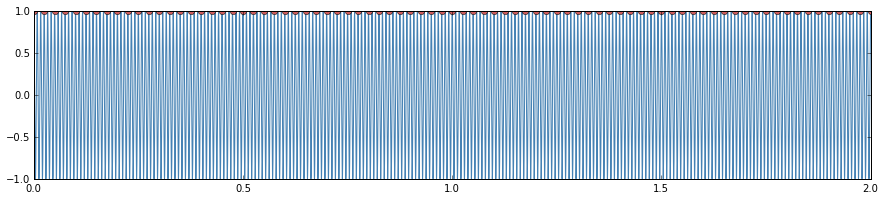

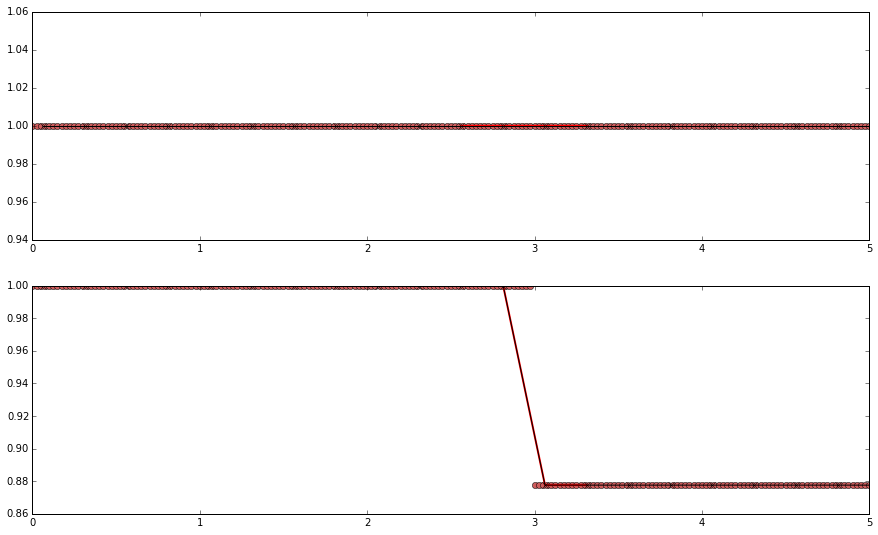

In [13]:
shutterfreq=40. 
#Hz
#tsample=(freq/shutterfreq)*1e3
tselect=np.arange(0,tottime,1.0/shutterfreq)
#t[::int(tsample+0.5)]
pl.figure(figsize=(15,3))
phi=np.pi/2
pl.plot(t,wave(t),color='SteelBlue')
pl.plot(tselect,wave(tselect),'o', color='IndianRed')

pl.xlim(0,2.0)

#print [i for i in range(0,len(tselect),41) if len(tselect[i:i+41])>1]
totflux=np.array([[i+0.125*0.5,(wave(tselect[(tselect>=i)*(tselect<(i+0.125))])).mean()] for i in np.arange(0,tottime, 0.25) if len(tselect[(tselect>=i)*(tselect<i+1)])>1]).T
    
fig=pl.figure(figsize=(15,9))
ax1=fig.add_subplot(211)
#pl.plot(t,wave(t),color='SteelBlue',alpha=0.5)
pl.plot(tselect,wave(tselect),'o', color='IndianRed')
pl.plot(totflux[0][(totflux[0]<3.5)*(totflux[0]>2.5)],totflux[1][(totflux[0]<3.5)*(totflux[0]>2.5)],'r-', lw=2)
pl.plot(totflux[0],totflux[1],'kx-')
pl.xlim(0,5.0)

totflux=np.array([[i+0.125*0.5,(waveglitch(tselect[(tselect>=i)*(tselect<(i+0.125))],3.0)).mean()] for i in np.arange(0,tottime, 0.25) if len(tselect[(tselect>=i)*(tselect<i+1)])>1]).T

ax1=fig.add_subplot(212)
#pl.plot(t,wave(t),color='SteelBlue',alpha=0.5)
pl.plot(tselect,waveglitch(tselect,3.0),'o', color='IndianRed')
pl.plot(totflux[0][(totflux[0]<3.5)*(totflux[0]>2.5)],totflux[1][(totflux[0]<3.5)*(totflux[0]>2.5)],'r-', lw=2)
pl.plot(totflux[0],totflux[1],'kx-')
pl.xlim(0,5.0)



## now integrate under a moere realistic 15millisec interval the 41Hz cadence

[  0.00000000e+00   2.43902439e-02   4.87804878e-02 ...,   9.99268293e+01
   9.99512195e+01   9.99756098e+01] [ -1.50000000e-02   9.39024390e-03   3.37804878e-02 ...,   9.99118293e+01
   9.99362195e+01   9.99606098e+01]


(0, 1.0)

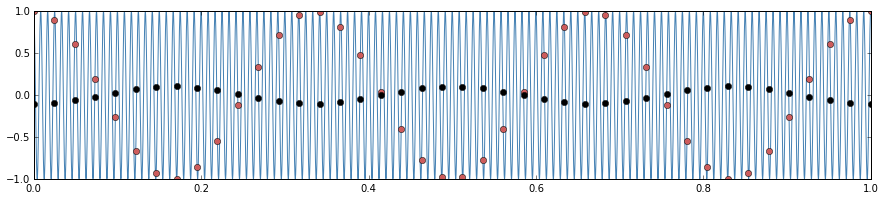

In [14]:
shutterfreq=41. 
#Hz
#tsample=(freq/shutterfreq)*1e3
tselect=np.arange(0,tottime,1.0/shutterfreq)
#t[::int(tsample+0.5)]
dtselect=15e-3 
print tselect, tselect-dtselect
#t[::int(tsample+0.5)]
pl.figure(figsize=(15,3))
phi=np.pi/2
pl.plot(t,wave(t),color='SteelBlue')
pl.plot(tselect,wave(tselect),'o', color='IndianRed')
pl.plot(tselect,waveinteg(tselect,dtselect)/dtselect,'o', color='k')
#pl.ylim(-1,1)

pl.xlim(0,1.0)

(0, 5.0)

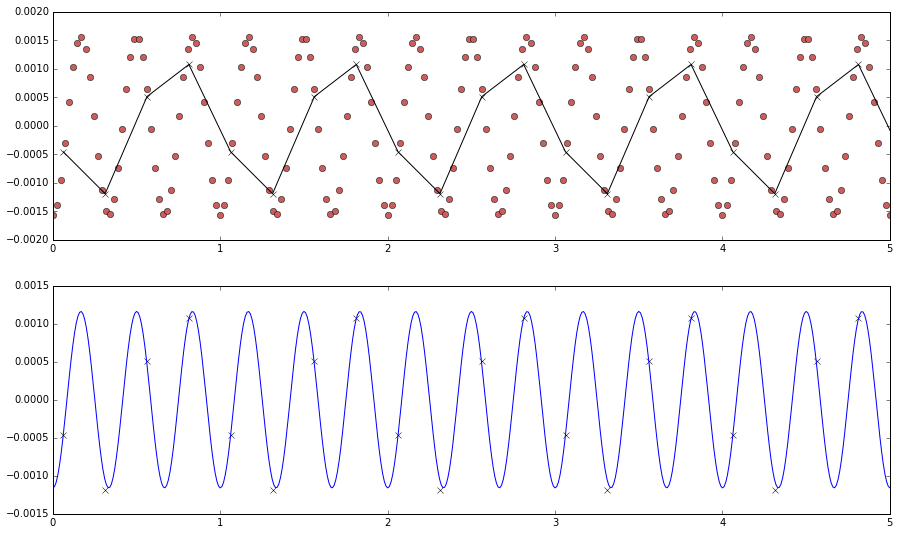

In [15]:
totflux=np.array([[i+0.125*0.5,(waveinteg(tselect[(tselect>=i)*(tselect<(i+0.125))], dtselect)).mean()] for i in np.arange(0,tottime, 0.25) if len(tselect[(tselect>=i)*(tselect<i+1)])>1]).T
    
fig=pl.figure(figsize=(15,9))
ax1=fig.add_subplot(211)
#pl.plot(t,wave(t),color='SteelBlue',alpha=0.5)
pl.plot(tselect,waveinteg(tselect,dtselect),'o', color='IndianRed')
pl.plot(totflux[0],totflux[1],'kx-')
pl.xlim(0,5.0)
ax2=fig.add_subplot(212)
pl.plot(totflux[0],totflux[1],'kx')
p0 = [1.0, 3.0, 0.3] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=([totflux[0]*(totflux[0]>3),totflux[1]*(totflux[0]>3)]))
tnew=np.arange(0,totflux[0][-1]-totflux[0][0],0.01)
pl.plot(tnew,fitfunc(p1, tnew) )
pl.xlim(0,5.0)